In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
df.info()
# there are no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
unique_value = df["region"].nunique()  
print(unique_value) 

4


In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [9]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


# Encoding categorical data

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first',categories='auto'),[1,4,5])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
pd.DataFrame(x).head() 

,0,1,2,3,4,5,6,7
0,0,1,0,0,1,19,27.9,0
1,1,0,0,1,0,18,33.77,1
2,1,0,0,1,0,28,33,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.88,0


# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
pd.DataFrame(x).head() 

,0,1,2,3,4,5,6,7
0,-1.010519,1.970587,-0.566418,-0.611324,1.765481,-1.438764,-0.453320,-0.908614
1,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-1.509965,0.509621,-0.078767
2,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-0.797954,0.383307,1.580926
3,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.441948,-1.305531,-0.908614
4,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.513149,-0.292556,-0.908614


# PCA

In [12]:
import plotly.express as px
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
x=pca.fit_transform(x)
PVE=pca.explained_variance_ratio_
print(PVE)

[0.19216849 0.16586792 0.13701263 0.13277753]


In [13]:
total_var = PVE.sum() * 100
print(total_var)

62.782657158416335


In [14]:
pd.DataFrame(x).head() 

,0,1,2,3
0,-0.553534,1.555510,2.094445,-0.668775
1,1.655404,-0.525503,1.093006,-0.384095
2,1.581891,-0.431678,0.203768,0.748523
3,-1.775405,-1.417192,0.742248,-0.125408
4,-1.285313,-1.360950,0.477302,-0.012752


In [15]:
# splitting the dataset into training and test set for the RF algorithm
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size= 0.2,random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor


In [17]:
regressor = RandomForestRegressor(n_estimators=190,random_state=0)
regressor.fit(x_tr,y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=190,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [18]:
y_pred= regressor.predict(x_te)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_te,y_pred)
mse = mean_squared_error(y_te,y_pred)
rmse = np.sqrt(mse)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MAE: 4583.481395
MSE: 45512435.790419
RMSE: 6746.290521


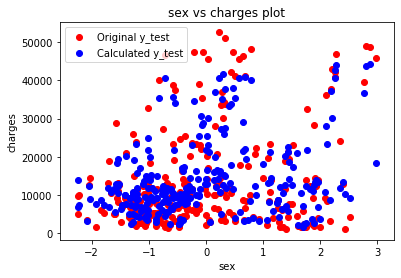

In [20]:
plt.scatter(x_te[:,0],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,0],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges plot')
plt.legend()
plt.show()

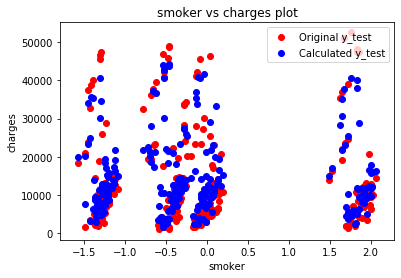

In [21]:
plt.scatter(x_te[:,1],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,1],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges plot')
plt.legend()
plt.show()

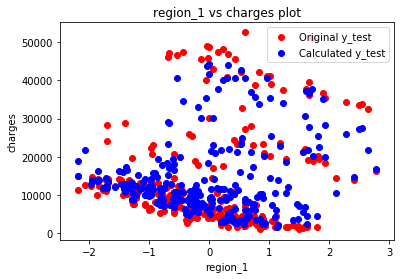

In [22]:
plt.scatter(x_te[:,2],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,2],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('region_1')
plt.ylabel('charges')
plt.title('region_1 vs charges plot')
plt.legend()
plt.show()

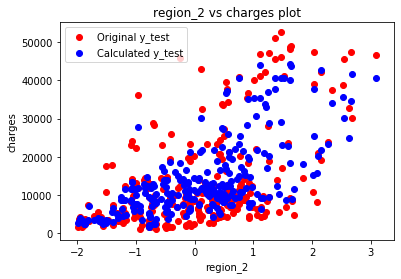

In [23]:
plt.scatter(x_te[:,3],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,3],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('region_2')
plt.ylabel('charges')
plt.title('region_2 vs charges plot')
plt.legend()
plt.show()